### 3)	Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:
a.	Import the necessary packages
b.	Load the training and testing data
c.	Define the network architecture using Keras
d.	Train the model using SGD/Adam optimizer
e.	Evaluate the network
f.	Plot the training loss and accuracy

### 12)	Implementing Feedforward neural networks with Keras and TensorFlow
a.	Import the necessary packages
b.	Load the training and testing data (MNIST/CIFAR10)
c.	Define the network architecture using Keras
d.	Train the model using SGD
e.	Evaluate the network
f.	Plot the training loss and accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
test = pd.read_csv("./datasets/cifar10_test.csv")
train = pd.read_csv("./datasets/cifar10_train.csv")

In [3]:
x_train = train.drop('label',axis=1).values
x_test = test.drop('label',axis=1).values

#.values is used to extract the underlying NumPy array from a Pandas DataFrame.

In [4]:
shape = x_train.shape[1]

In [5]:
x_train = x_train.reshape(-1,shape)
x_test= x_test.reshape(-1,shape)

#reshaping the x_train and x_test datasets to ensure they are in the correct format for the machine learning model. 

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
y_train = train['label'].values
y_test = test['label'].values

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print("x_train shape : "+str(x_train.shape))
print("y_train shape : "+str(y_train.shape))
print("x_test shape : "+str(x_test.shape))
print("y_test shape : "+str(y_test.shape))

x_train shape : (50000, 3072)
y_train shape : (50000, 10)
x_test shape : (10000, 3072)
y_test shape : (10000, 10)


In [10]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
model = Sequential([
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2556 - loss: 2.0155 - val_accuracy: 0.3745 - val_loss: 1.7304
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3816 - loss: 1.7202 - val_accuracy: 0.3936 - val_loss: 1.6731
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4068 - loss: 1.6535 - val_accuracy: 0.3915 - val_loss: 1.6884
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4287 - loss: 1.6002 - val_accuracy: 0.4474 - val_loss: 1.5782
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4411 - loss: 1.5644 - val_accuracy: 0.4541 - val_loss: 1.5344
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4545 - loss: 1.5314 - val_accuracy: 0.4487 - val_loss: 1.5463
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4633 - loss: 1.5081 - val_accuracy: 0.4488 - val_loss: 1.5494
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4634 - loss: 1.4949 - 

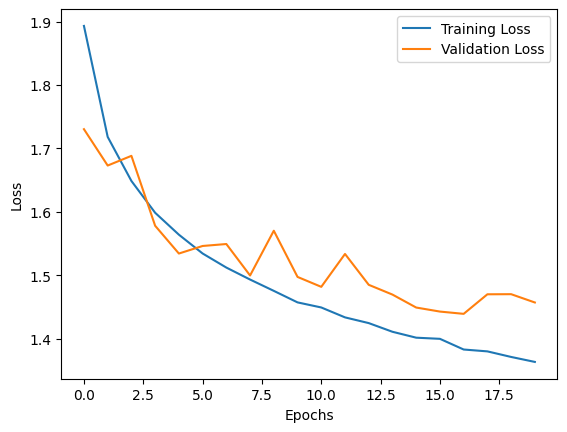

In [14]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

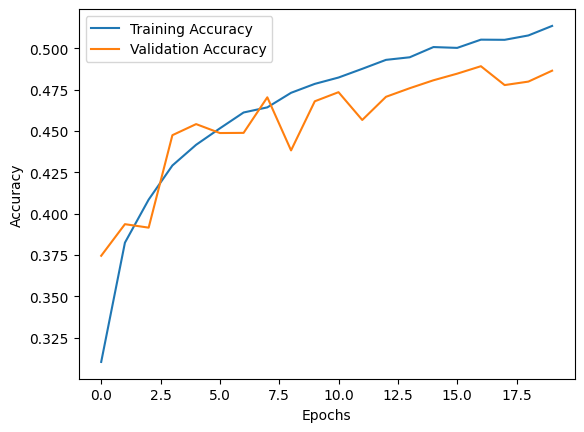

In [15]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
loss, accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.4871 - loss: 1.4558


In [17]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [18]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Actual :  frog
Predicted :  frog


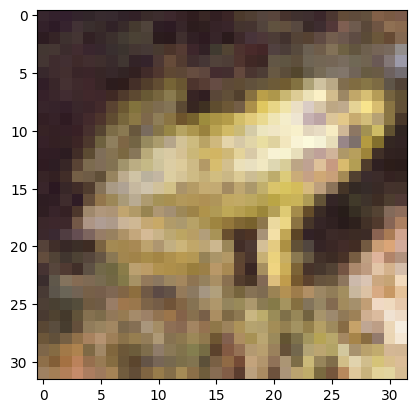

In [19]:
n=19
plt.imshow(x_test[n].reshape(32,32,3))
print('Actual : ',classes[np.argmax(y_test[n])])
print('Predicted : ',classes[np.argmax(y_pred[n])])
plt.show()